# Comparing CNN Architectures for CIFAR-10 Image Classification

## Import Necessary Libraries

In [1]:
import torch
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy

## Load and Preprocess Data

In [2]:
from tensorflow.keras.datasets import cifar10
# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

## Define Helper Functions

In [5]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, val_losses, title="Training vs. Validation Loss" ):
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:
def plot_accuracy(train_accuracy, val_accuracy, title="Training vs. Validation Accuracy" ):
    plt.figure(figsize=(8, 6))
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [65]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, title='Confusion Matrix'):

    # Define class labels
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Adjust figure size if needed
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
    plt.yticks(fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

## Model 1: Baseline CNN

### Model Definition


In [7]:
model1 = Sequential([
    Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(16, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(32, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,986 (285.10 KB)

 Trainable params: 72,986 (285.10 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [9]:
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Model Training

In [11]:
history = model1.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32, validation_split=0.1, callbacks=early_stopping)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3677 - loss: 1.7418 - val_accuracy: 0.5292 - val_loss: 1.3104
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5440 - loss: 1.2837 - val_accuracy: 0.5966 - val_loss: 1.1441
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5989 - loss: 1.1282 - val_accuracy: 0.6186 - val_loss: 1.0943
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6335 - loss: 1.0329 - val_accuracy: 0.6246 - val_loss: 1.0790
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6612 - loss: 0.9676 - val_accuracy: 0.6506 - val_loss: 1.0087
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6911 - loss: 0.8835 - val_accuracy: 0.6638 - val_loss: 0.9766
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7055 - loss: 0.8347 - val_accuracy: 0.6864 - val_loss: 0.9059
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7203 - loss: 0.7933 -

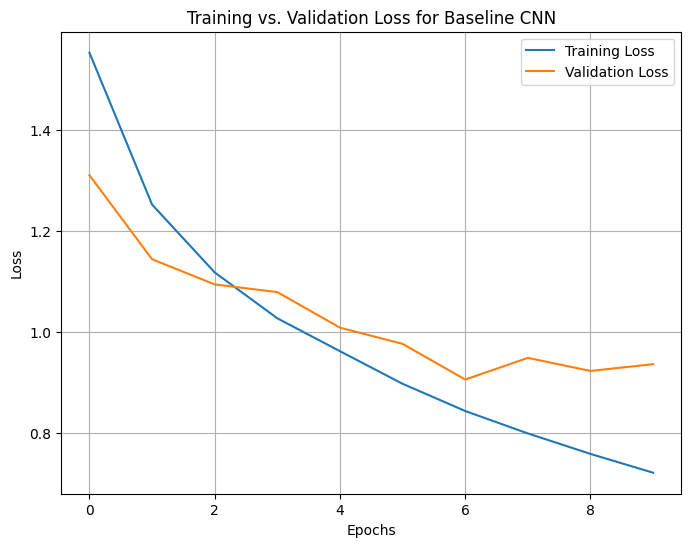

In [12]:
plot_loss(history.history['loss'], history.history['val_loss'], title='Training vs. Validation Loss for Baseline CNN')

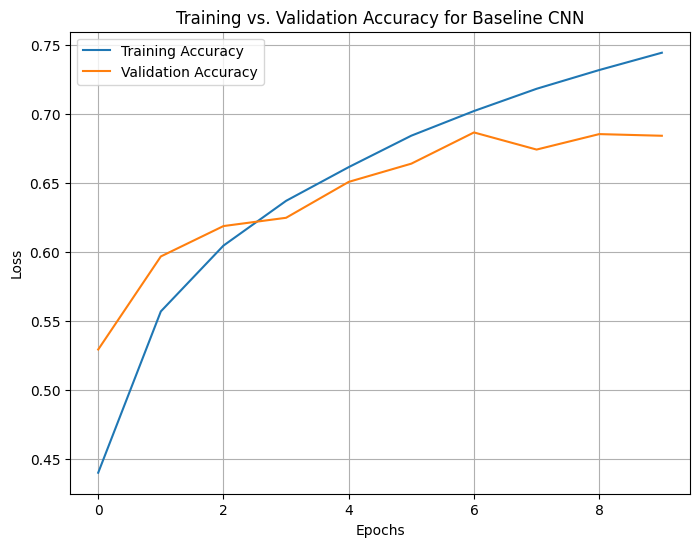

In [15]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'], title='Training vs. Validation Accuracy for Baseline CNN')

### Model Evaluation

In [16]:
loss_of_model1, accuracy_of_model1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_of_model1:.4f}, Test Accuracy: {accuracy_of_model1:.4f}")


Test Loss: 0.9359, Test Accuracy: 0.6758


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:\n')
print(classification_report(y_test.argmax(axis=1), model1.predict(X_test).argmax(axis=1)))

cm_model1 = confusion_matrix(y_test.argmax(axis=1), model1.predict(X_test).argmax(axis=1))
print('\nConfusion Matrix:\n', cm_model1)

Classification Report:

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1000
           1       0.78      0.83      0.80      1000
           2       0.59      0.50      0.54      1000
           3       0.48      0.50      0.49      1000
           4       0.57      0.67      0.62      1000
           5       0.56      0.55      0.56      1000
           6       0.77      0.73      0.75      1000
           7       0.70      0.77      0.73      1000
           8       0.78      0.80      0.79      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Confusion Matrix:
 [[655  25  67  30  40  12  12  13  97  49]
 [  9 826   8  13   5   8   9  11  27  84]
 [ 46   9 498 100 133  72  56

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


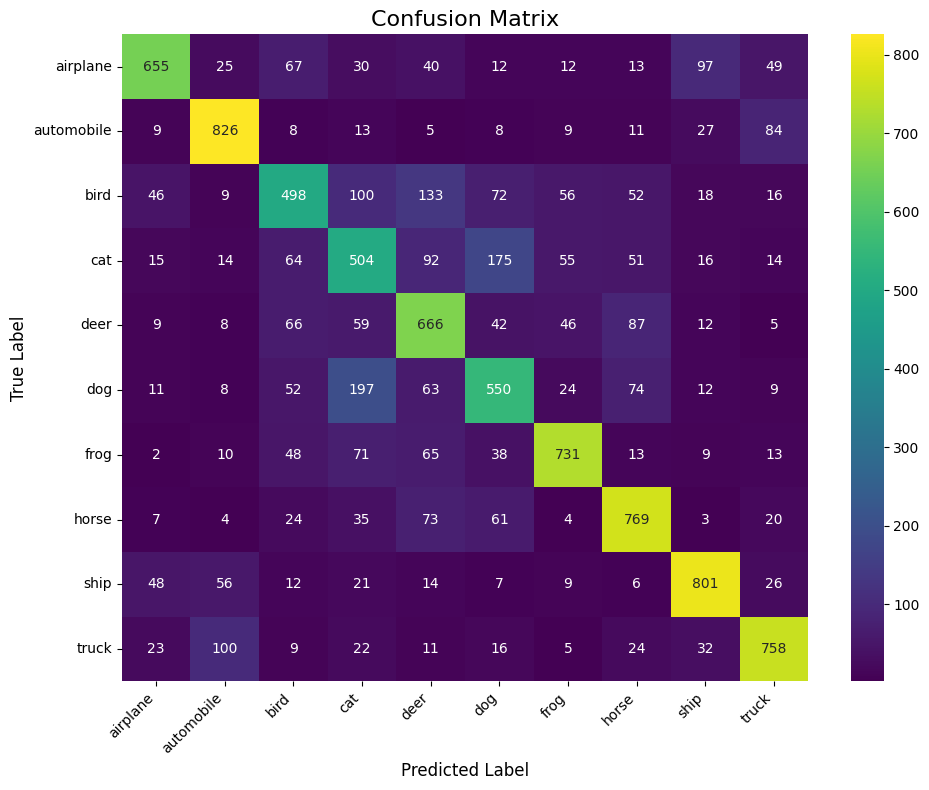

In [66]:
plot_confusion_matrix(cm_model1)

## Model 2: Increased Filter Size

### Model Definition

In [17]:
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [19]:
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)


### Model Training

In [20]:
history = model2.fit(X_train_tensor, y_train_tensor, epochs=20, batch_size=32, validation_split=0.1, callbacks=early_stopping)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3746 - loss: 1.7061 - val_accuracy: 0.6036 - val_loss: 1.0973
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6351 - loss: 1.0421 - val_accuracy: 0.6768 - val_loss: 0.9292
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7075 - loss: 0.8412 - val_accuracy: 0.7064 - val_loss: 0.8602
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7477 - loss: 0.7175 - val_accuracy: 0.7252 - val_loss: 0.8080
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7847 - loss: 0.6176 - val_accuracy: 0.7068 - val_loss: 0.8621
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8094 - loss: 0.5365 - val_accuracy: 0.7446 - val_loss: 0.7843
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8375 - loss: 0.4634 - val_accuracy: 0.7534 - val_loss: 0.7892
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8614 - loss: 0.3929 -

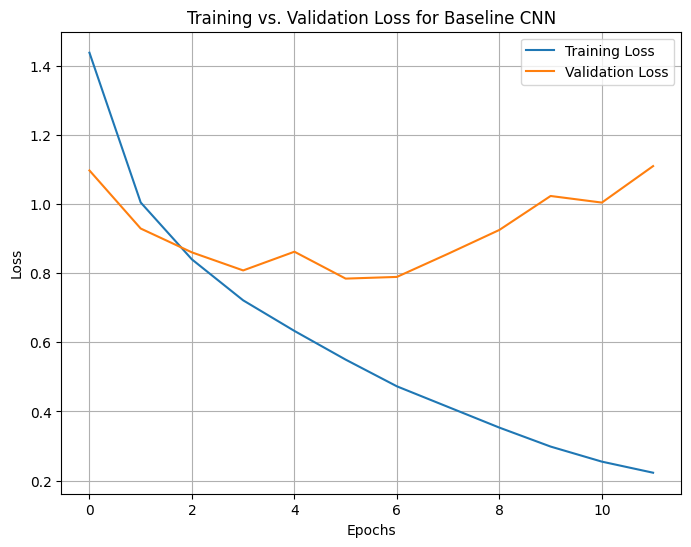

In [21]:
plot_loss(history.history['loss'], history.history['val_loss'], title='Training vs. Validation Loss for Baseline CNN')

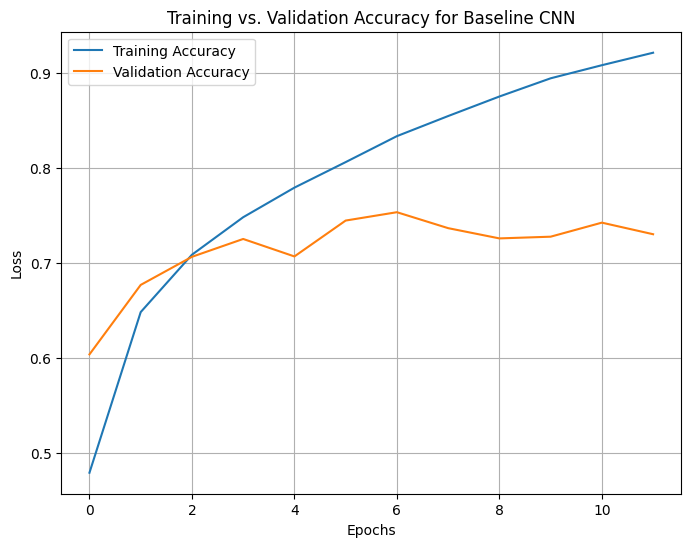

In [22]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'], title='Training vs. Validation Accuracy for Baseline CNN')

### Model Evaluation

In [23]:
loss_of_model2, accuracy_of_model2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_of_model2:.4f}, Test Accuracy: {accuracy_of_model2:.4f}")


Test Loss: 0.8308, Test Accuracy: 0.7377


In [67]:
print('Classification Report:\n')
print(classification_report(y_test.argmax(axis=1), model2.predict(X_test).argmax(axis=1)))

cm_model2 = confusion_matrix(y_test.argmax(axis=1), model2.predict(X_test).argmax(axis=1))
print('\nConfusion Matrix:\n', cm_model2)

Classification Report:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.81      0.76      1000
           1       0.88      0.83      0.86      1000
           2       0.66      0.60      0.63      1000
           3       0.57      0.56      0.57      1000
           4       0.73      0.65      0.69      1000
           5       0.66      0.60      0.63      1000
           6       0.79      0.80      0.80      1000
           7       0.73      0.81      0.77      1000
           8       0.81      0.86      0.84      1000
           9       0.79      0.84      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix:
 [[807   8  27  15  11   5  11  11  71  34]
 [ 26 834   3   3   3   6   6   6  28  85]
 [ 80   5 603  65  83  52  49

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


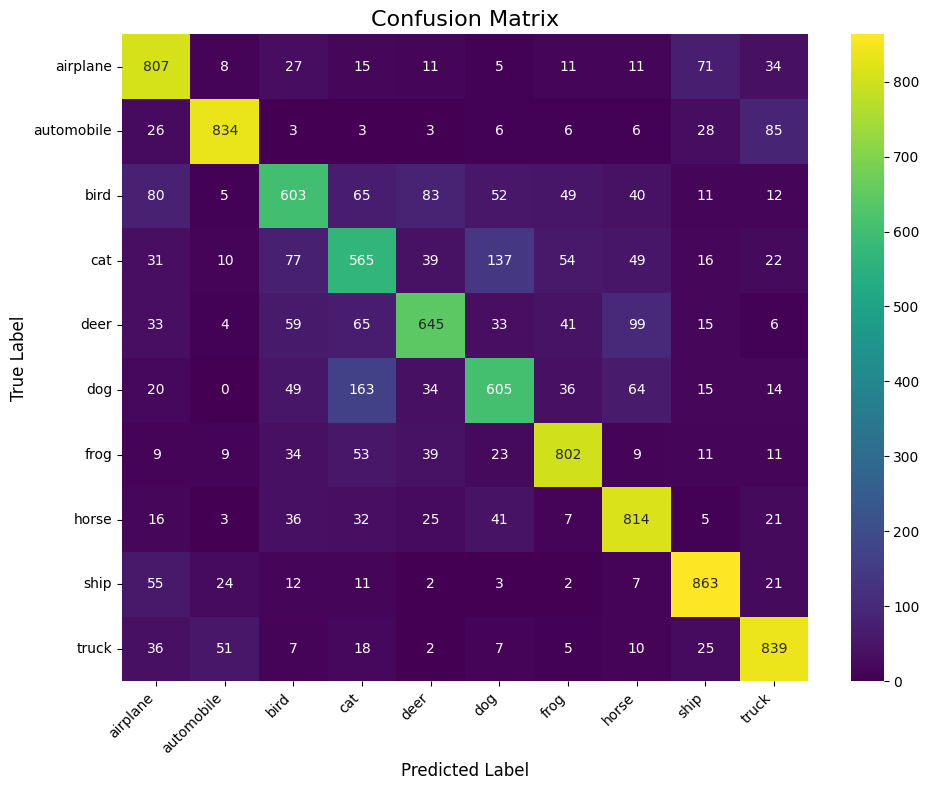

In [68]:
plot_confusion_matrix(cm_model2)

## Model 3: Additional Dense Layer

### Model Definition

In [56]:
model3 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364,426 (1.39 MB)

 Trainable params: 364,426 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [57]:
model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)


### Model Training

In [58]:
history = model3.fit(X_train_tensor, y_train_tensor, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3095 - loss: 1.8510 - val_accuracy: 0.5688 - val_loss: 1.1992
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5585 - loss: 1.2330 - val_accuracy: 0.6448 - val_loss: 1.0132
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6409 - loss: 1.0248 - val_accuracy: 0.6910 - val_loss: 0.8618
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6903 - loss: 0.8923 - val_accuracy: 0.7104 - val_loss: 0.8123
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7219 - loss: 0.7982 - val_accuracy: 0.7268 - val_loss: 0.7918
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7489 - loss: 0.7276 - val_accuracy: 0.7048 - val_loss: 0.8580
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7670 - loss: 0.6723 - val_accuracy: 0.7282 - val_loss: 0.8104
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7908 - loss: 0.6073 -

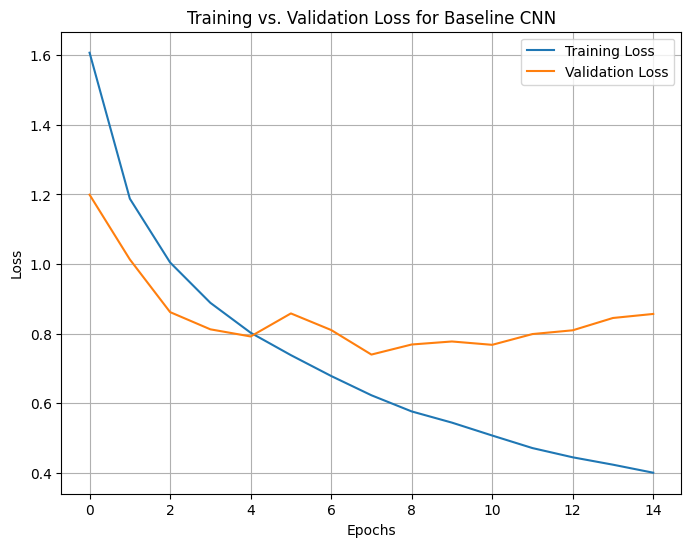

In [59]:
plot_loss(history.history['loss'], history.history['val_loss'], title='Training vs. Validation Loss for Baseline CNN')

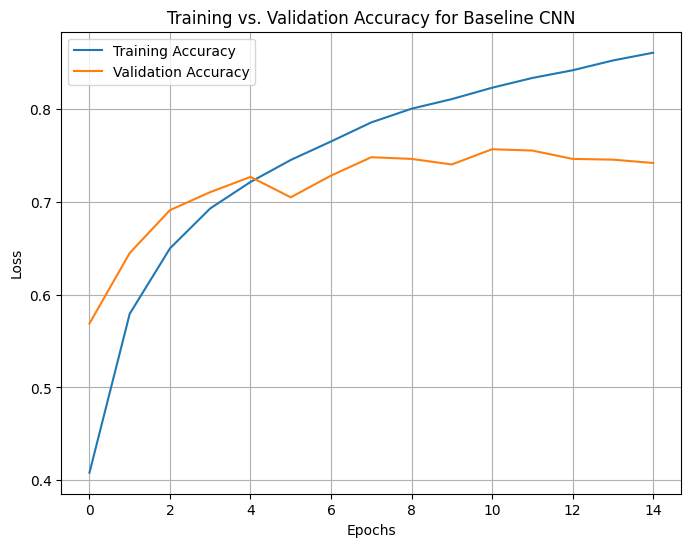

In [60]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'], title='Training vs. Validation Accuracy for Baseline CNN')

### Model Evaluation

In [61]:
loss_of_model3, accuracy_of_model3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_of_model3:.4f}, Test Accuracy: {accuracy_of_model3:.4f}")


Test Loss: 0.9509, Test Accuracy: 0.7279


In [71]:
print('Classification Report:\n')
print(classification_report(y_test.argmax(axis=1), model3.predict(X_test).argmax(axis=1)))
cm_model3 = confusion_matrix(y_test.argmax(axis=1), model3.predict(X_test).argmax(axis=1))
print('\nConfusion Matrix:\n', cm_model3)

Classification Report:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1000
           1       0.88      0.81      0.84      1000
           2       0.63      0.65      0.64      1000
           3       0.54      0.56      0.55      1000
           4       0.69      0.67      0.68      1000
           5       0.66      0.60      0.63      1000
           6       0.84      0.76      0.80      1000
           7       0.71      0.82      0.76      1000
           8       0.86      0.79      0.82      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion Matrix:
 [[807   8  45  20  17   6   2  23  41  31]
 [ 28 809   5  11   3   4   9   8  25  98]
 [ 70   3 646  50  84  46  41

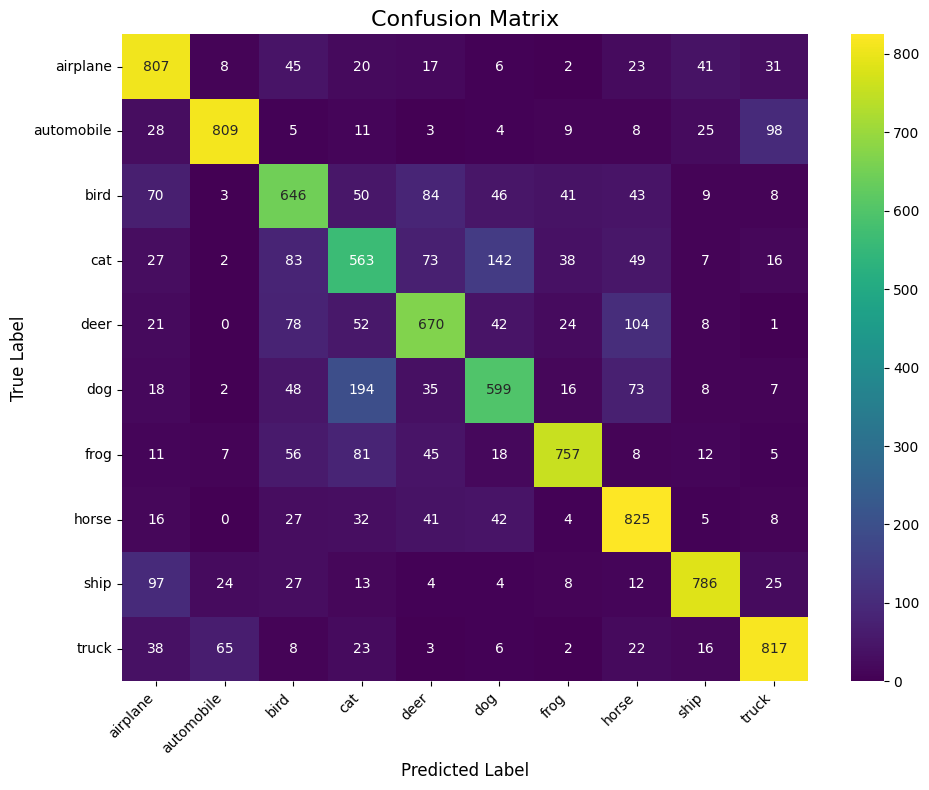

In [72]:
plot_confusion_matrix(cm_model3)